### Factor Analysis Assignment Solution

Jay Urbain, PhD

Objectives:    
- **Students can explain factor analysis**

- **Students understand how factor analysis differs from PCA and ICA**

- **Students can identify common use cases for factor analysis**

- Students can apply factor analysis to an appropriate dataset (i.e. purely quantitative)

- Students can explain dimensionality reduction techniques for categorical (MCA) and mixed (FAMD) data

- Students can apply MCA and FAMD to appropriate datasets

References:

-  Dr J Maiti, IIT KharagpurMod-01, Lec-33 Factor Analysis    
https://www.youtube.com/watch?v=n3y3xLNoPk4

- Barbara Engelhardt, Factor Analysis   
https://www.cs.princeton.edu/~bee/courses/scribe/lec_10_02_2013.pdf

- Wikipedia - Factor Analysis    
https://en.wikipedia.org/wiki/Factor_analysis   

- Factor Analysis - an introduction     
https://www.youtube.com/watch?v=WV_jcaDBZ2I

- Introduction to Factor Analysis in Python   
https://www.datacamp.com/community/tutorials/introduction-factor-analysis

- Factor Analysis in Python  
https://www.youtube.com/watch?v=ttBs_wfw_6U


### Factor Analysis

Factor Analysis is a method for modeling observed variables. It is commonly used for data analysis and dimensionality reduction. The key concept of Factor Analysis is that some of variables have similar patterns because they are all related to factors (latent or unobserved variables) that cannot be directly measured. The factors typically are viewed as broad concepts or ideas that may describe an observed phenomenon.

For example,

- A psychologist is interested to measure a person's mental ability

- A cardiologist wants to measure risk of a heart attack   

- A marketing manager is interested to measure the purchase intention of customers

- A psychiatrist wants to measure depression   

- A supply chain analyst is interested in measuring supply chain coordination .  


### Applying factor analysis

- Find the hidden factors behind observed variables: The hidden factors cannot measured directly, but can be interpretable.

- Estimate the factor loadings.

- Evaluate the factors we extracted.

#### Data

The dataset we work on is called `bfi` from Psych R-package. It consists of 2800 observations on 28 variables including 25 self-report personality items and three additional demographic variables (sex, education, and age). In this project, we plan to figure out the  factors of the first 25 items in dataset.

Dataset: https://rdrr.io/cran/psych/man/bfi.html

In [0]:
# import sys
# sys.path
# !ls

In [0]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [0]:
df= pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/bfi.csv")

In [0]:
df.head()

In [0]:
df.columns

In [0]:
df.drop(['gender', 'education', 'age'], axis=1, inplace=True)

In [0]:
df.columns

In [0]:
df.info()

In [0]:
df = df.iloc[:, 1:]

In [0]:
df.head()

In [0]:
df.describe()

In [0]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show();

### Perform Factor Analysis

factor_analyzer package documentations:   
https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

# Ensure that the factor_analyzer package is installed 
pip install factor_analyzer

In [0]:
df = df.dropna()

In [0]:
df= pd.read_csv("data/bfi.csv")
df.describe()

In [0]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [0]:
# Dropping missing values rows
df.dropna(inplace=True)

In [0]:
df.info()

In [0]:
df.columns

In [0]:
df.head()

In [0]:
df.describe()

#### Adequacy Test

Before you perform factor analysis, best practice is to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

- Bartlett’s Test

- Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [0]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [0]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [0]:
kmo_model

The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

#### Choosing the Number of Factors

For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [0]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

In [0]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Things to consider    

Factor analysis is typically done using the “varimax” rotation method. What if we utilize other kinds of rotation, such as “quartimax” , “bentlerT”, “equamax” and etc. Do they change the results dramatically or not?

In this case, the type of factor analysis we use is exploratory factor anaylsis (EFA). There is another type of factor analysis, `Confirmatory factor analysis (CFA)` which is a more complex approach that tests the hypothesis that the items are associated with specific factors. What if we do the CFA on the example dataset?

### Assignment: FCA on Kaggle Big Mart Sales Dataset

The big-mart-sales-dataset contains images of products contains 60,000 28x28 3-channel images. Originally, the goal was to predict sales from images. We are using the images for factor analysis.   
https://www.kaggle.com/aakash2016/big-mart-sales-dataset  

Step 6 is your primary task in this assignment.

1) Download the big-mart-sales-dataset 

2) Install opencv: conda install -c menpo opencv

3) Install the factor_analyzer package: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

4) Create a correlation matrix, apply the KMO adequacy test, and generate a scree plot.

5) From the KMO/scree plot identify the optimal number of factors

6) Apply factor analysis with your identified optimal number of factors.

7) Compare ICA reconstructed images with PCA.

The notebook, DimensionalityReduction_52_1_fa_assign.ipynb, has a complete example with an arbitrary (very small) number of factors.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the training file to get labels
f = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Train_UWu5bXk.csv'
# read the data
train=pd.read_csv(f)

In [2]:
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [7]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
images = [cv2.imread(file) for file in glob('train_LbELtWX/train/*.png')]

Now we will convert these images into a numpy array format so that we can perform mathematical operations on them and also plot the images.

In [8]:
images = np.array(images)
images.shape

(21603, 28, 28, 3)

As you can see above, it’s a 3-dimensional array. We must convert it to 1-dimension as all the upcoming techniques only take 1-dimensional input. To do this, we need to flatten the images:

In [10]:
image = []
for i in range(0,21603):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

In [24]:
image.shape

(21603, 2352)

Let us now create a dataframe containing the pixel values of every individual pixel present in each image, and also their corresponding labels (for labels, we will make use of the train.csv file).

As you can see in the above table, there aren’t too many missing values (just 2 variables have them actually). We can impute the values using appropriate methods, or we can set a threshold of, say 20%, and remove the variable having more than 20% missing values. Let’s look at how this can be done in Python:

In [12]:
train = pd.read_csv('train_LbELtWX/train.csv')     # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

#### Now you will decompose the dataset using Factor Analysis:

1) Create a FactorAnalysis object for `n_components`

2) Use your FA object to `fit_transform` your `feat_cols` in dataframe `df`.


In [32]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols])


Here, `n_components` will decide the number of factors in the transformed data. 

After transforming the data, it’s time to visualize the results.

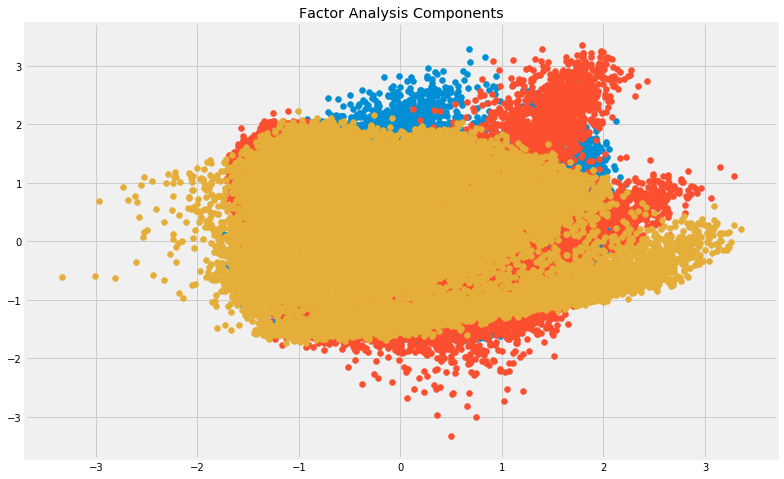

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2], FA[:,0])


Interesting. We can see all the different factors in the above graph. Here, the x-axis and y-axis represent the values of decomposed factors. 

It is hard to observe these factors individually, but we have been able to reduce the dimensions of our data successfully.

#### Plot the images using the independent components

<Figure size 432x288 with 0 Axes>

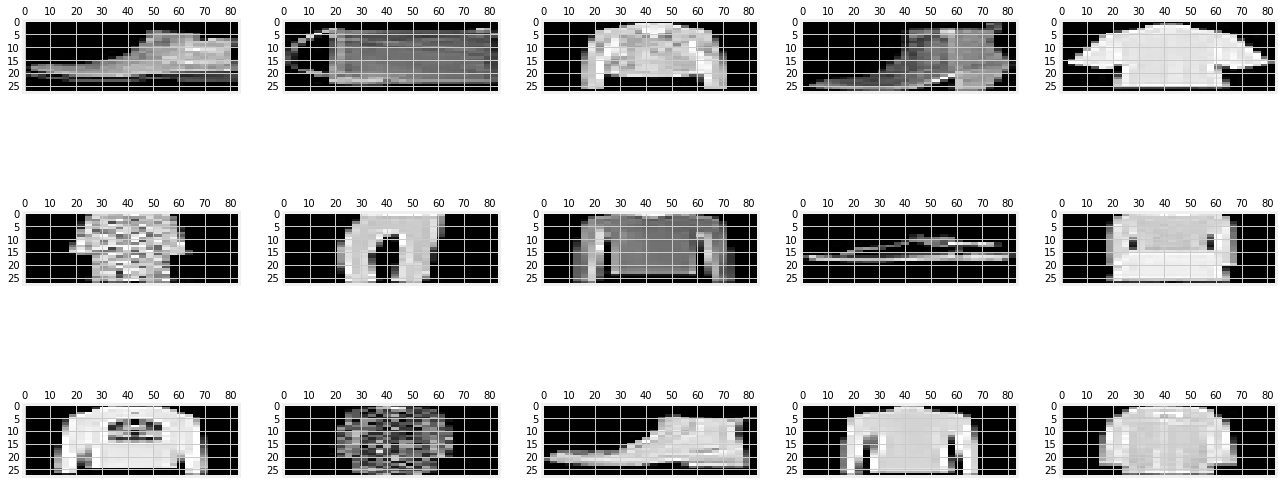

In [34]:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28*3)).astype(float))
plt.show();

#### Lets use PCA and compare the reconstructed images with ICA

In [38]:
#Let’s implement PCA using Python and transform the dataset:

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df[feat_cols].values)

No handles with labels found to put in legend.


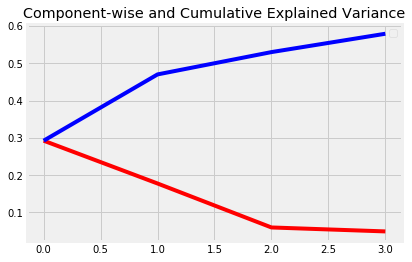

In [36]:
plt.plot(range(4), pca.explained_variance_ratio_, color="red")
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_), color="blue")
plt.title("Component-wise and Cumulative Explained Variance")
plt.legend();

Text(0.5, 0.98, '4-Component PCA')

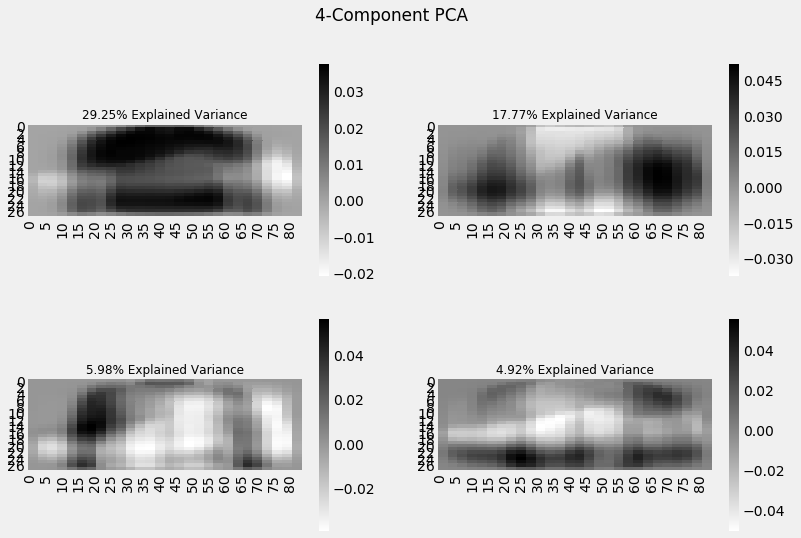

In [39]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

Each additional dimension we add to the PCA technique captures less and less of the variance in the model. The first component is the most important one, followed by the second, then the third, and so on.